In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [ ]:
renewvia_yellow = "#f79e28"
renewvia_orange = "#f2641c"
blue = "#87CEEB"

In [5]:
paired = pd.read_csv("paired_enc_rect.csv")
paired.head()

,Unnamed: 0,renewvia_id,X_pre,end_pre,status,connection_period_initial,country_pre,nigeria_community_pre,kenya_community_pre,age_pre,...,avg_mon_consumption_cum,Pre.Connection.Income,Post.Connection.Income..Incorrect.,Income.Differene,Serial.Meter,Customer.Name,Community,Type,phoneNumber,avg_household_income_post.y
0,1,131268,1463,7202022_11:16,0,NaN,2,NaN,kalobeyei_settlement,30.0,...,6.987348,9000,0,-9000,SM5R-04-0000994C,Muhoza Apolina M,Kalobeyei Settlement,Residential,254797000000,22000
1,2,131427,1944,6302021_6:32,0,NaN,2,NaN,kalobeyei_settlement,35.0,...,1.818472,4000,1,-3999,SM16R-02-0000DD2A,Banywesize Jean marie M,Kalobeyei Settlement,Residential,254795000000,21000
2,3,141140,1916,6292021_9:52,0,NaN,2,NaN,kalobeyei_town,32.0,...,3.783320,1500,15000,13500,SM5R-04-000098D0,Jones Abule Ngichwae,Kalobeyei Town,Residential,254706000000,25000
3,4,141223,2056,6292021_3:30,0,NaN,2,NaN,kalobeyei_town,36.0,...,0.506080,1000,1000,0,SM5R-04-000097AB,Nakalalian Lopeidir Kamais,Kalobeyei Town,Residential,254742000000,15000
4,5,190106,2170,1192021_5:49,0,NaN,2,NaN,kapelbok,52.0,...,0.701304,1000,500,-500,SMRSD-03-0002298C,Losiru Peter,Kapelbok,Residential,254741000000,12000


In [6]:
# Gender Equality
ind_vars = ["PV_Size_kWp", "Customers", "CAPEX_USD"]
var_list = {
    "girls_schooling_change": ["PV_Size_kWp", "CAPEX_USD"],
    "boys_schooling_change": ["PV_Size_kWp", "CAPEX_USD"],
    "water_collection_time": ["Paired","PV_Size_kWp", "CAPEX_USD"],
    "water_collection_school_aged": ["Paired"],
    "cooking_fuel_collection_time": ["Paired"],
    "hired_women": ["Customers"]
    }
# var = "water_collection_school_aged"

Index(['Unnamed: 0', 'renewvia_id', 'X_pre', 'end_pre', 'status',
       'connection_period_initial', 'country_pre', 'nigeria_community_pre',
       'kenya_community_pre', 'age_pre',
       ...
       'avg_mon_consumption_cum', 'Pre.Connection.Income',
       'Post.Connection.Income..Incorrect.', 'Income.Differene',
       'Serial.Meter', 'Customer.Name', 'Community', 'Type', 'phoneNumber',
       'avg_household_income_post.y'],
      dtype='object', length=195)

In [7]:
ci_enc = pd.read_csv("ci_enc_rect.csv")
ci_enc.head()

,Unnamed: 0,renewvia_id,X,country,community,connection_period_non_original_subscriber,connection_period,business_type,operation_status,non_renewvia_electrical_sources,...,displayName,projectName,tariff,Sum.of.kWh.Consumed.x,Total.Payment..Local.,avg_mon_consumption_period,Sum.of.kWh.Consumed.y,Sum.of.Net.Payment.Amount..Local.,avg_mon_consumption_cum,hired_women
0,1,131101,13,2,kalobeyei_settlement,NaN,4,5,1.0,1.0,...,Bar/Restaurant (Neema Nabindu Shikuru),Kalobeyei Settlement,Commercial,810.34265,21577.5009,38.876849,2454.90294,63701.3337,37.391069,NaN
1,2,131106,73,2,kalobeyei_settlement,3.0,4,2,1.0,1.0,...,Shop (Kaoma Kiese Bienvenue ),Kalobeyei Settlement,Commercial,442.60737,10678.8327,21.234449,475.12352,11483.2405,7.236692,0.0
2,3,131107,5,2,kalobeyei_settlement,NaN,4,2,NaN,1.0,...,Shop (Maina John Itathi),Kalobeyei Settlement,Commercial,453.69111,12728.9065,21.766201,1497.94730,40617.4389,22.815505,NaN
3,4,131111,6,2,kalobeyei_settlement,NaN,4,2,NaN,1.0,...,Shop (Wambu Michael Kimani),Kalobeyei Settlement,Commercial,39.08574,1110.3848,1.875170,82.47669,2078.0329,1.256217,NaN
4,5,131112,94,2,kalobeyei_town,5.0,4,2,1.0,1.0,...,Sawmill (Maombi Sebiti),Kalobeyei Settlement,Commercial,454.84257,12596.1431,21.821443,888.35603,22175.2348,13.530711,0.0


# 1. Profiling

## Demographics
* Age, Gender
* Country
* Community

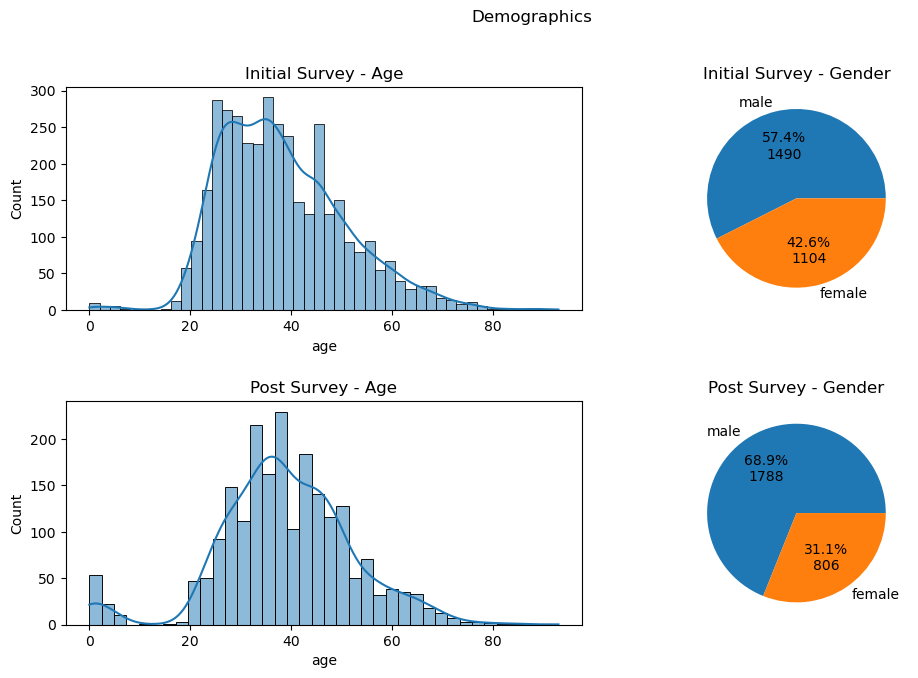

In [59]:
# Age: Filter outliers
dfs = [initial, hs_post]
age_dfs = []
for df in dfs:
    df["age"] = pd.to_numeric(df["age"], downcast='integer')
    age_dfs.append(df[df["age"] < 100])

# Gender: Pie Chart Formatting 
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

gender_dfs = []
for df in dfs:
    total = df['gender'].value_counts().values.sum()
    df_vals = df['gender'].value_counts().values
    df_groups = df['gender'].value_counts().index
    gender_dfs.append([df_vals, df_groups])

# Visualizing
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 7))
fig.suptitle('Demographics')
sns.histplot(data=age_dfs[0], ax=ax1, kde=True, x="age")
ax1.set_title("Initial Survey - Age")
ax2.pie(x=gender_dfs[0][0], labels=gender_dfs[0][1], autopct=fmt)
ax2.set_title("Initial Survey - Gender")
sns.histplot(data=age_dfs[1], ax=ax3, kde=True, x="age")
ax3.set_title("Post Survey - Age")
ax4.pie(x=gender_dfs[1][0], labels=gender_dfs[1][1], autopct=fmt)
ax4.set_title("Post Survey - Gender")
fig.tight_layout(pad=2)
plt.show()